In [ ]:
import os
import re
import pandas as pd
from openpyxl import load_workbook
import matplotlib.pyplot as plt

In [ ]:
result_root = "./Out"
all_results = []

model_dirs = sorted(
    [d for d in os.listdir(result_root) if d.startswith("Model_")],
    key=lambda x: int(re.search(r"\d+", x).group()),
)

for model_dir in model_dirs:
    model_path = os.path.join(result_root, model_dir, "result.xlsx")

    if os.path.exists(model_path):
        df = pd.read_excel(model_path)
        all_results.append(df)

if all_results:
    final_df = pd.concat(all_results, ignore_index=True)
    excel_path = os.path.join(result_root, "all_results.xlsx")
    final_df.to_excel(excel_path, index=False)

    wb = load_workbook(excel_path)
    ws = wb.active

    for col in ws.columns:
        max_length = 0
        col_letter = col[0].column_letter  # get the column name
        for cell in col:
            if cell.value:
                try:
                    # split the cell value by '\n' and get the max length
                    max_length = max(
                        max_length,
                        max(len(line) for line in str(cell.value).split("\n")),
                    )
                except:
                    pass
        # set the column width according to the max_length + 2
        ws.column_dimensions[col_letter].width = max_length + 2
        wb.save(excel_path)
else:
    print("No result files found.")

In [2]:
final_df

,Model Name,RNN Model,Input Size,RNN Output Size,Number of Layers,State Pred Hidden Layers,Installment Pred Hidden Layers,Loan Pred Hidden Layers,Recovery Rate Pred Hidden Layers,Learning Rate,...,Best Validation Loan Done AUC,Best Validation Installment Done Accuracy,Best Validation Loan Done Accuracy,Best Validation Loan Done F1,Best Validation Installment Done F1,Best Validation Loan Done Recall,Best Validation Installment Done Recall,Best Validation Installment Done Precision,Best Validation Loan Done Precision,Total Time
0,Model_1,LSTM,21,32,1,[],[],[],[],0.0005,...,0.965434,0.979667,0.997620,0.961781,0.944924,0.931034,0.899547,0.995123,0.994628,532.970378
1,Model_2,LSTM,21,32,2,[],[],[],[],0.0005,...,0.967242,0.980939,0.997767,0.964061,0.948661,0.934626,0.911582,0.988883,0.995409,523.258980
2,Model_3,LSTM,21,32,3,[],[],[],[],0.0005,...,0.968198,0.981590,0.997576,0.961652,0.950980,0.936782,0.913132,0.992103,0.987879,947.572334
3,Model_4,LSTM,21,64,1,[],[],[],[],0.0005,...,0.967853,0.981638,0.997598,0.961624,0.950777,0.936063,0.914919,0.989561,0.988619,678.728731
4,Model_5,LSTM,21,64,2,[],[],[],[],0.0005,...,0.971302,0.981702,0.997557,0.961201,0.950769,0.943247,0.913608,0.991081,0.979851,492.712117
5,Model_6,LSTM,21,64,3,[],[],[],[],0.0005,...,0.969984,0.981301,0.997689,0.963208,0.949898,0.940374,0.913847,0.988910,0.987179,608.653281
6,Model_7,RNN,21,32,1,[],[],[],[],0.0005,...,0.960477,0.979463,0.997470,0.958505,0.943365,0.920977,0.894185,0.998271,0.999221,558.500882
7,Model_8,RNN,21,32,2,[],[],[],[],0.0005,...,0.962608,0.979719,0.997540,0.960119,0.944854,0.925287,0.900381,0.993949,0.997676,467.533350
8,Model_9,RNN,21,32,3,[],[],[],[],0.0005,...,0.966777,0.980999,0.997559,0.960473,0.948520,0.933908,0.914442,0.985236,0.988593,637.524212
9,Model_10,RNN,21,64,1,[],[],[],[],0.0005,...,0.964631,0.979569,0.997403,0.958519,0.945030,0.929598,0.902407,0.991880,0.989297,419.293729


In [3]:
final_df.columns

Index(['Model Name', 'RNN Model', 'Input Size', 'RNN Output Size',
       'Number of Layers', 'State Pred Hidden Layers',
       'Installment Pred Hidden Layers', 'Loan Pred Hidden Layers',
       'Recovery Rate Pred Hidden Layers', 'Learning Rate', 'Number of Epochs',
       'Model Structure', 'Best Train State MSE',
       'Best Train Recovery Rate MSE', 'Best Train Installment Done AUC',
       'Best Train Loan Done AUC', 'Best Train Installment Done Accuracy',
       'Best Train Loan Done Accuracy', 'Best Train Loan Done F1',
       'Best Train Installment Done F1', 'Best Train Loan Done Recall',
       'Best Train Installment Done Recall',
       'Best Train Installment Done Precision',
       'Best Train Loan Done Precision', 'Best Validation State MSE',
       'Best Validation Recovery Rate MSE',
       'Best Validation Installment Done AUC', 'Best Validation Loan Done AUC',
       'Best Validation Installment Done Accuracy',
       'Best Validation Loan Done Accuracy', 'Best Va

In [4]:
# find the row corresponding to the smallest Best Train Recovery Rate MSE
best_train_idx = final_df["Best Train Recovery Rate MSE"].idxmin()
best_train_model = final_df.loc[best_train_idx, ["Model Name", "Best Train Recovery Rate MSE"]]

# find the row corresponding to the smallest Best Validation Recovery Rate MSE
best_val_idx = final_df["Best Validation Recovery Rate MSE"].idxmin()
best_val_model = final_df.loc[best_val_idx, ["Model Name", "Best Validation Recovery Rate MSE"]]

# print the best models
print("Best Train Recovery Rate MSE Model:")
print(best_train_model)
print("\nBest Validation Recovery Rate MSE Model:")
print(best_val_model)

Best Train Recovery Rate MSE Model:
Model Name                      Model_18
Best Train Recovery Rate MSE    0.001492
Name: 17, dtype: object

Best Validation Recovery Rate MSE Model:
Model Name                           Model_18
Best Validation Recovery Rate MSE    0.001523
Name: 17, dtype: object


In [5]:
metrics = [
    "Best Train State MSE",
    "Best Train Recovery Rate MSE",
    "Best Train Installment Done AUC",
    "Best Train Loan Done AUC",
    "Best Train Installment Done Accuracy",
    "Best Train Loan Done Accuracy",
    "Best Train Loan Done F1",
    "Best Train Installment Done F1",
    "Best Train Loan Done Recall",
    "Best Train Installment Done Recall",
    "Best Train Installment Done Precision",
    "Best Train Loan Done Precision",
    "Best Validation State MSE",
    "Best Validation Recovery Rate MSE",
    "Best Validation Installment Done AUC",
    "Best Validation Loan Done AUC",
    "Best Validation Installment Done Accuracy",
    "Best Validation Loan Done Accuracy",
    "Best Validation Loan Done F1",
    "Best Validation Installment Done F1",
    "Best Validation Loan Done Recall",
    "Best Validation Installment Done Recall",
    "Best Validation Installment Done Precision",
    "Best Validation Loan Done Precision",
]

In [6]:
# calculate the mean of each metric for each RNN model
RNN_model_grouped_means = final_df.groupby("RNN Model")[metrics].mean()
RNN_model_grouped_means

,Best Train State MSE,Best Train Recovery Rate MSE,Best Train Installment Done AUC,Best Train Loan Done AUC,Best Train Installment Done Accuracy,Best Train Loan Done Accuracy,Best Train Loan Done F1,Best Train Installment Done F1,Best Train Loan Done Recall,Best Train Installment Done Recall,...,Best Validation Installment Done AUC,Best Validation Loan Done AUC,Best Validation Installment Done Accuracy,Best Validation Loan Done Accuracy,Best Validation Loan Done F1,Best Validation Installment Done F1,Best Validation Loan Done Recall,Best Validation Installment Done Recall,Best Validation Installment Done Precision,Best Validation Loan Done Precision
RNN Model,,,,,,,,,,,,,,,,,,,,,
GRU,0.029826,0.001562,0.955444,0.970668,0.981675,0.997920,0.965898,0.949504,0.941597,0.913321,...,0.955600,0.967272,0.980935,0.997594,0.961516,0.948953,0.934866,0.914224,0.986493,0.989839
LSTM,0.029969,0.001592,0.954927,0.971376,0.981504,0.997976,0.966936,0.949145,0.942994,0.912160,...,0.954550,0.968335,0.981140,0.997635,0.962254,0.949335,0.937021,0.911106,0.990943,0.988928
RNN,0.032834,0.001804,0.952183,0.967408,0.980844,0.997804,0.963775,0.946871,0.934986,0.906193,...,0.952352,0.964668,0.980353,0.997491,0.959583,0.946878,0.929598,0.906717,0.990881,0.991622


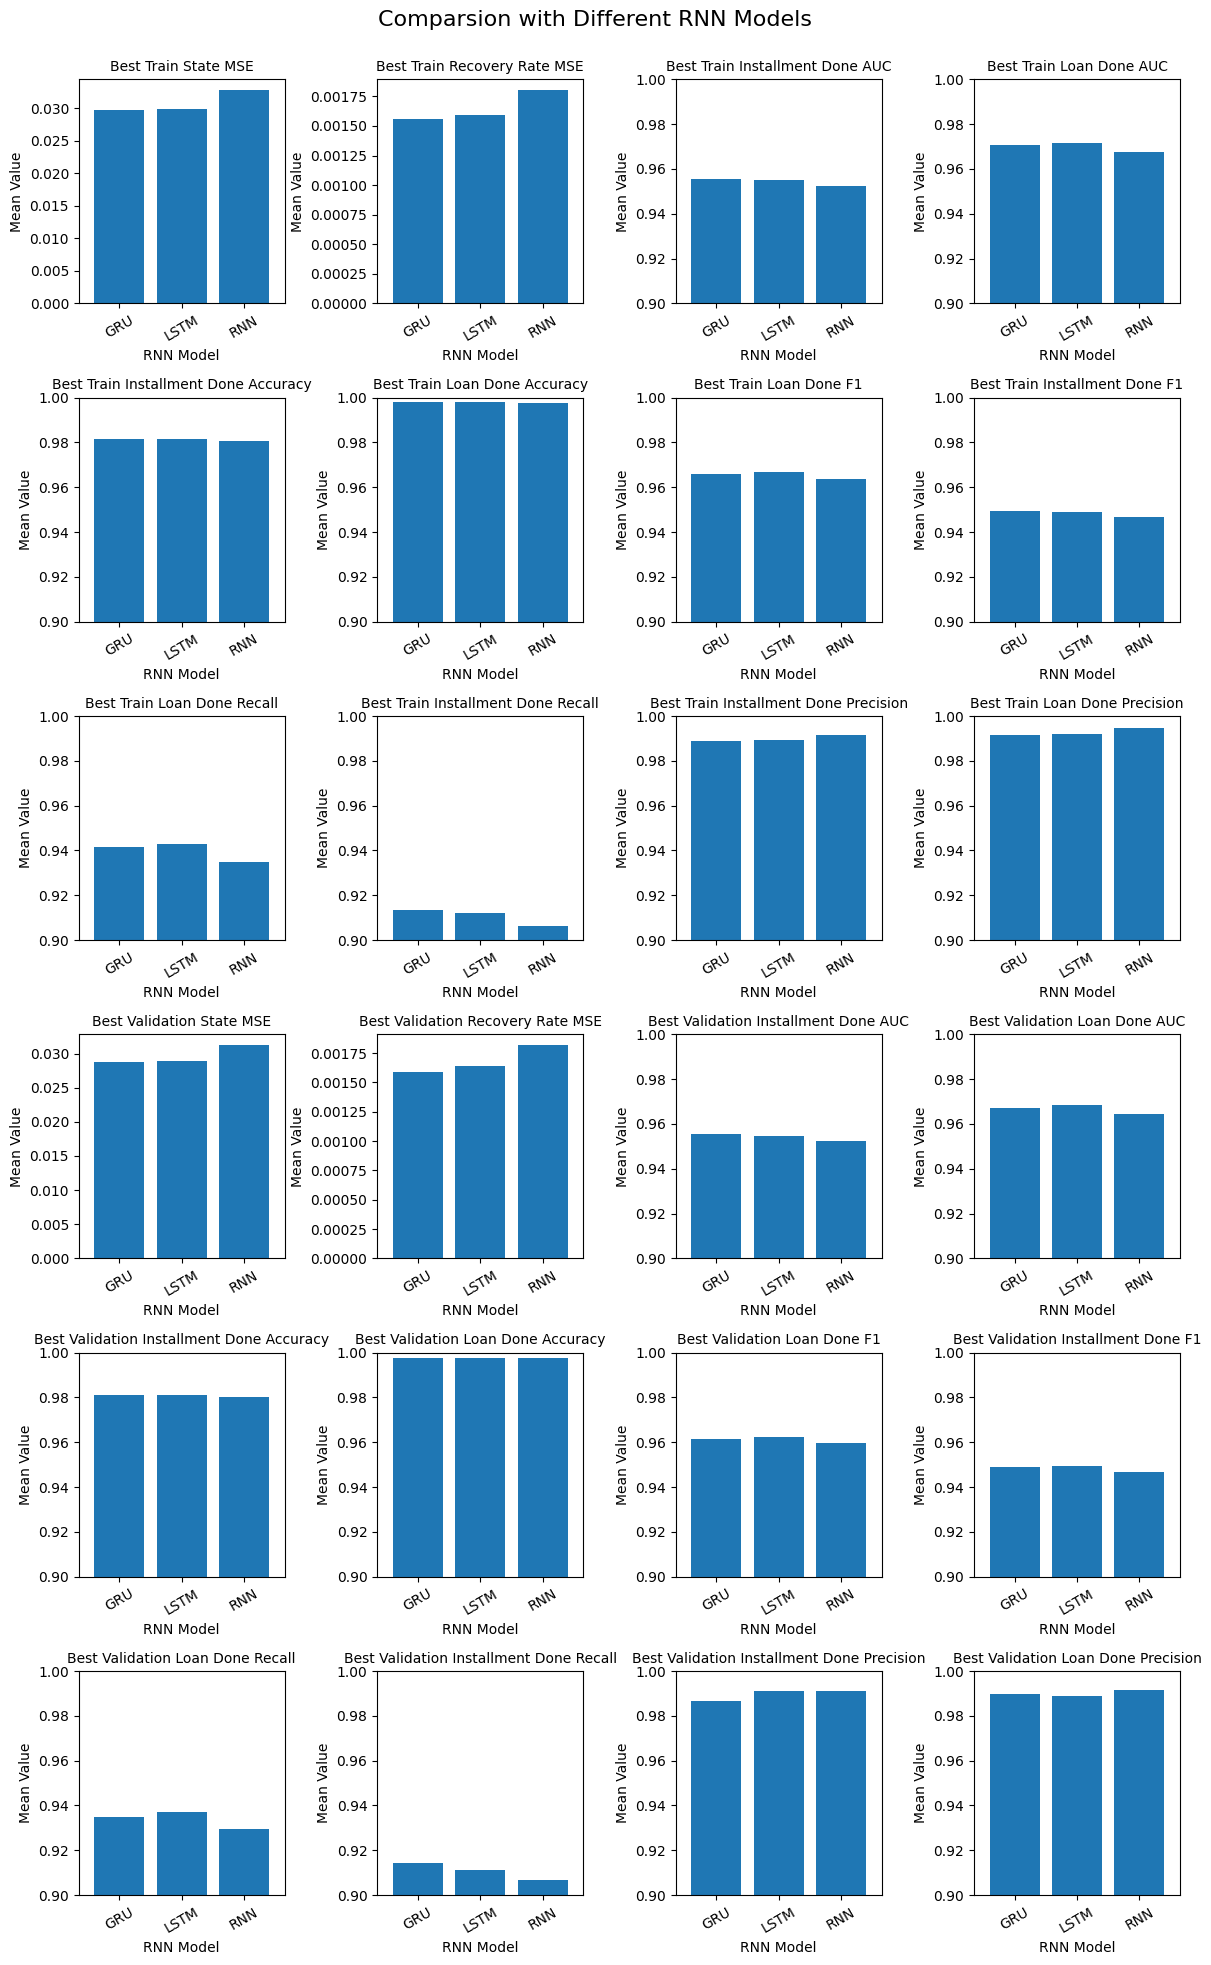

In [ ]:
rows, cols = 6, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 20))

mse_metrics = [
    "Best Train State MSE",
    "Best Train Recovery Rate MSE",
    "Best Validation State MSE",
    "Best Validation Recovery Rate MSE",
]

# grouped_means = final_df.groupby("RNN Model")[metrics].mean()

# draw bar plot for each metric
for ax, metric in zip(axes.flat, metrics):
    RNN_model_grouped_means[metric].plot(kind="bar", ax=ax, width=0.8)
    ax.set_title(metric, fontsize=10)
    ax.set_ylabel("Mean Value")
    ax.set_xlabel("RNN Model")
    ax.tick_params(axis="x", rotation=30)

    # set y-axis range to [0, 1] for MSE metrics
    if metric not in mse_metrics:
        ax.set_ylim(0.9, 1)  # except MSE, set y-axis range to [0.9, 1]

# add a title for the whole figure
fig.suptitle("Comparsion with Different RNN Models", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [7]:
# calculate the mean of each metric for each RNN model
RNN_output_size_grouped_means = final_df.groupby("RNN Output Size")[metrics].mean()
RNN_output_size_grouped_means

,Best Train State MSE,Best Train Recovery Rate MSE,Best Train Installment Done AUC,Best Train Loan Done AUC,Best Train Installment Done Accuracy,Best Train Loan Done Accuracy,Best Train Loan Done F1,Best Train Installment Done F1,Best Train Loan Done Recall,Best Train Installment Done Recall,...,Best Validation Installment Done AUC,Best Validation Loan Done AUC,Best Validation Installment Done Accuracy,Best Validation Loan Done Accuracy,Best Validation Loan Done F1,Best Validation Installment Done F1,Best Validation Loan Done Recall,Best Validation Installment Done Recall,Best Validation Installment Done Precision,Best Validation Loan Done Precision
RNN Output Size,,,,,,,,,,,,,,,,,,,,,
32,0.032411,0.001703,0.952886,0.968125,0.980914,0.997817,0.964174,0.947334,0.936445,0.907809,...,0.952792,0.965182,0.980579,0.997592,0.961161,0.947472,0.930556,0.907531,0.991179,0.993898
64,0.029341,0.001602,0.955483,0.971510,0.981768,0.997982,0.966899,0.949680,0.943274,0.913308,...,0.955542,0.968334,0.981039,0.997554,0.961074,0.949305,0.937101,0.913833,0.987698,0.986361


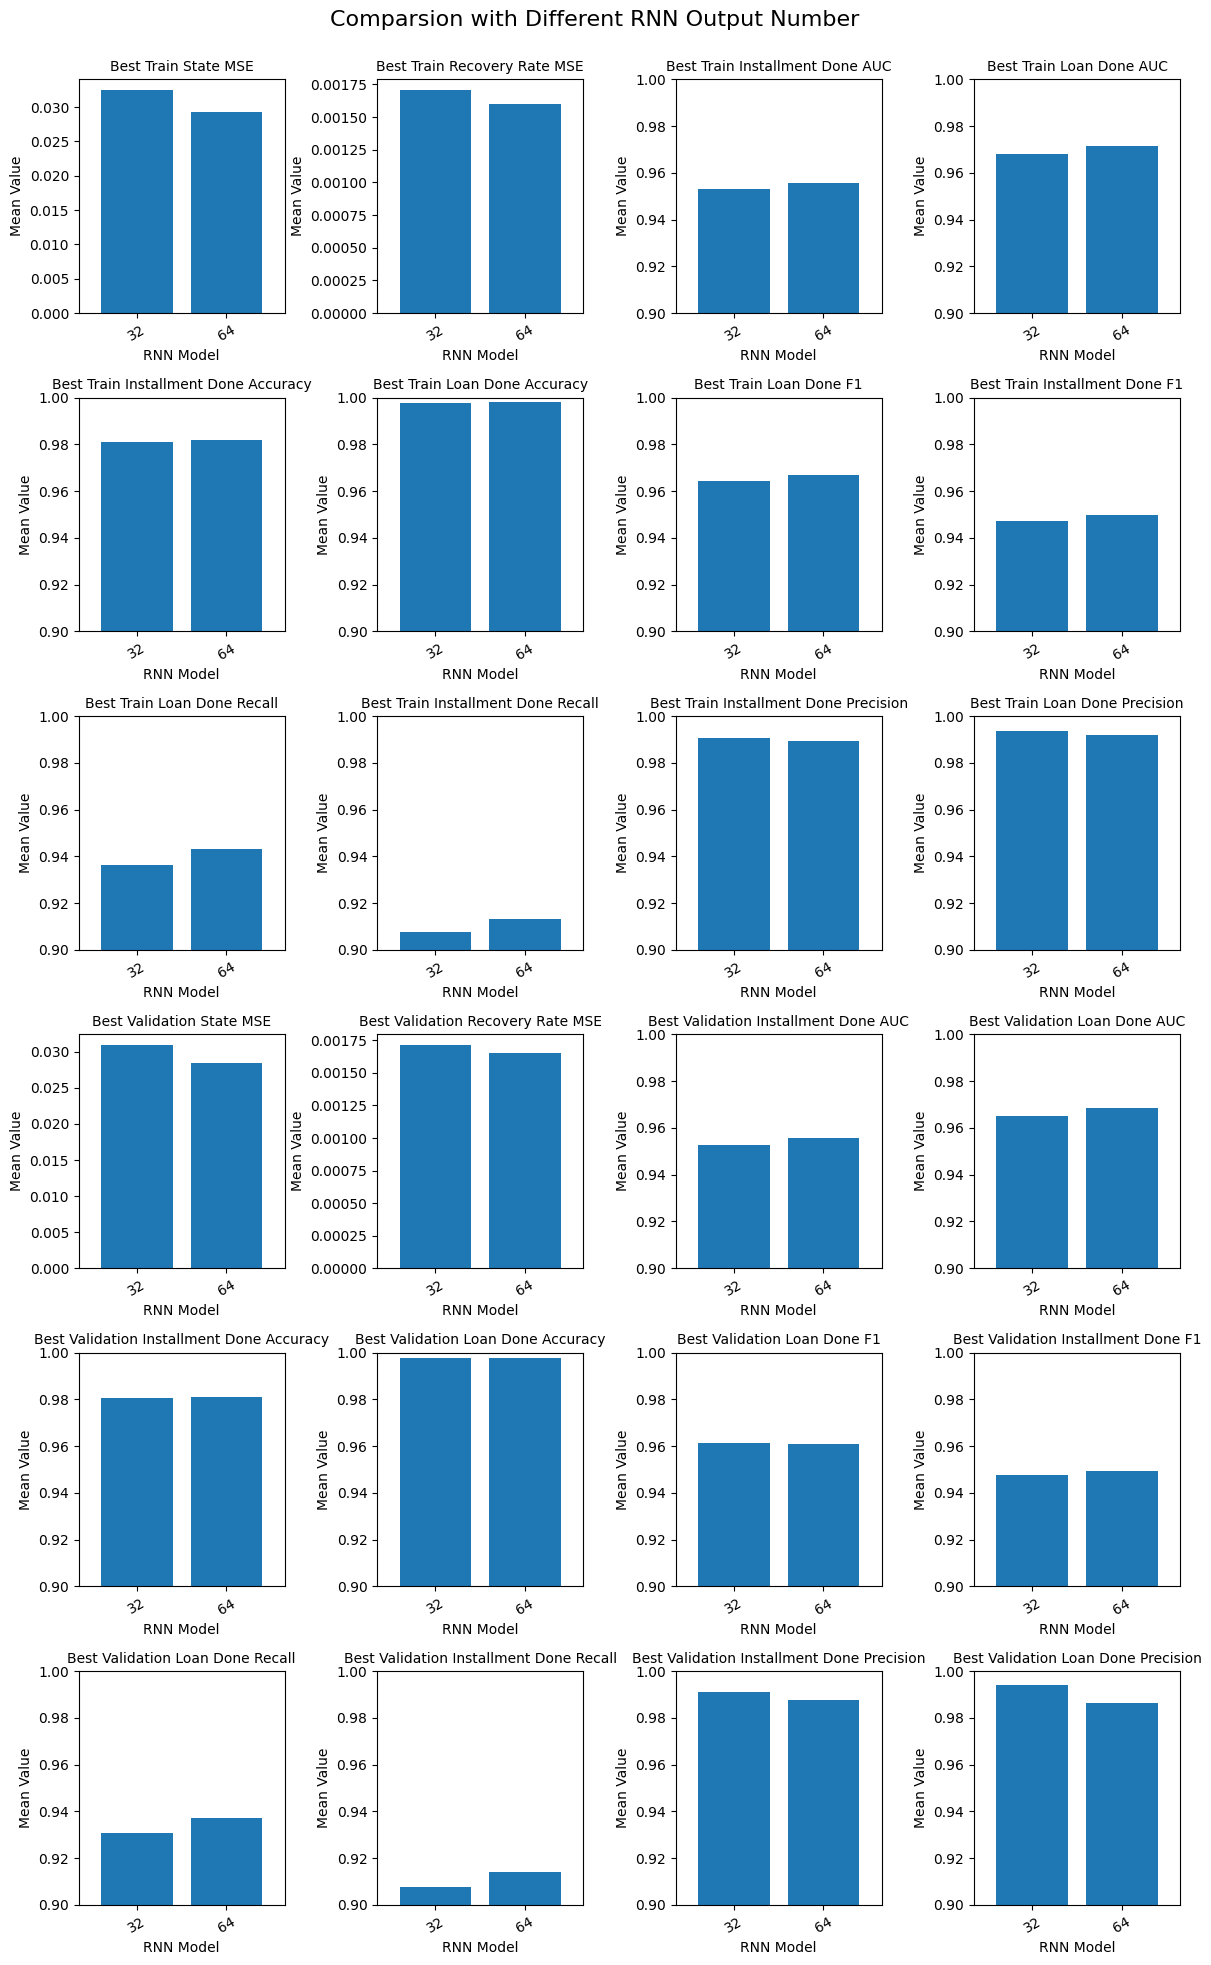

In [ ]:
rows, cols = 6, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 20))

mse_metrics = [
    "Best Train State MSE",
    "Best Train Recovery Rate MSE",
    "Best Validation State MSE",
    "Best Validation Recovery Rate MSE",
]

# grouped_means = final_df.groupby("RNN Model")[metrics].mean()

# draw bar plot for each metric
for ax, metric in zip(axes.flat, metrics):
    RNN_output_size_grouped_means[metric].plot(kind="bar", ax=ax, width=0.8)
    ax.set_title(metric, fontsize=10)
    ax.set_ylabel("Mean Value")
    ax.set_xlabel("RNN Model")
    ax.tick_params(axis="x", rotation=30)

    # set y-axis range to [0, 1] for MSE metrics
    if metric not in mse_metrics:
        ax.set_ylim(0.9, 1)  # except MSE, set y-axis range to [0.9, 1]

# add a title for the whole figure
fig.suptitle("Comparsion with Different RNN Output Number", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [8]:
# calculate the mean of each metric for each RNN model
RNN_num_layers_grouped_means = final_df.groupby("Number of Layers")[metrics].mean()
RNN_num_layers_grouped_means

,Best Train State MSE,Best Train Recovery Rate MSE,Best Train Installment Done AUC,Best Train Loan Done AUC,Best Train Installment Done Accuracy,Best Train Loan Done Accuracy,Best Train Loan Done F1,Best Train Installment Done F1,Best Train Loan Done Recall,Best Train Installment Done Recall,...,Best Validation Installment Done AUC,Best Validation Loan Done AUC,Best Validation Installment Done Accuracy,Best Validation Loan Done Accuracy,Best Validation Loan Done F1,Best Validation Installment Done F1,Best Validation Loan Done Recall,Best Validation Installment Done Recall,Best Validation Installment Done Precision,Best Validation Loan Done Precision
Number of Layers,,,,,,,,,,,,,,,,,,,,,
1,0.032986,0.001811,0.951596,0.967099,0.980832,0.997803,0.963739,0.946764,0.934347,0.904675,...,0.951434,0.964518,0.980226,0.997535,0.960277,0.946483,0.929239,0.904492,0.992634,0.993512
2,0.030477,0.001593,0.954493,0.969696,0.981330,0.997870,0.965043,0.948510,0.939642,0.911388,...,0.954201,0.966753,0.980940,0.997592,0.961533,0.948870,0.933788,0.910470,0.990682,0.991039
3,0.029166,0.001554,0.956465,0.972657,0.981860,0.998027,0.967826,0.950247,0.945589,0.915612,...,0.956867,0.969005,0.981261,0.997593,0.961544,0.949813,0.938458,0.917084,0.985000,0.985838


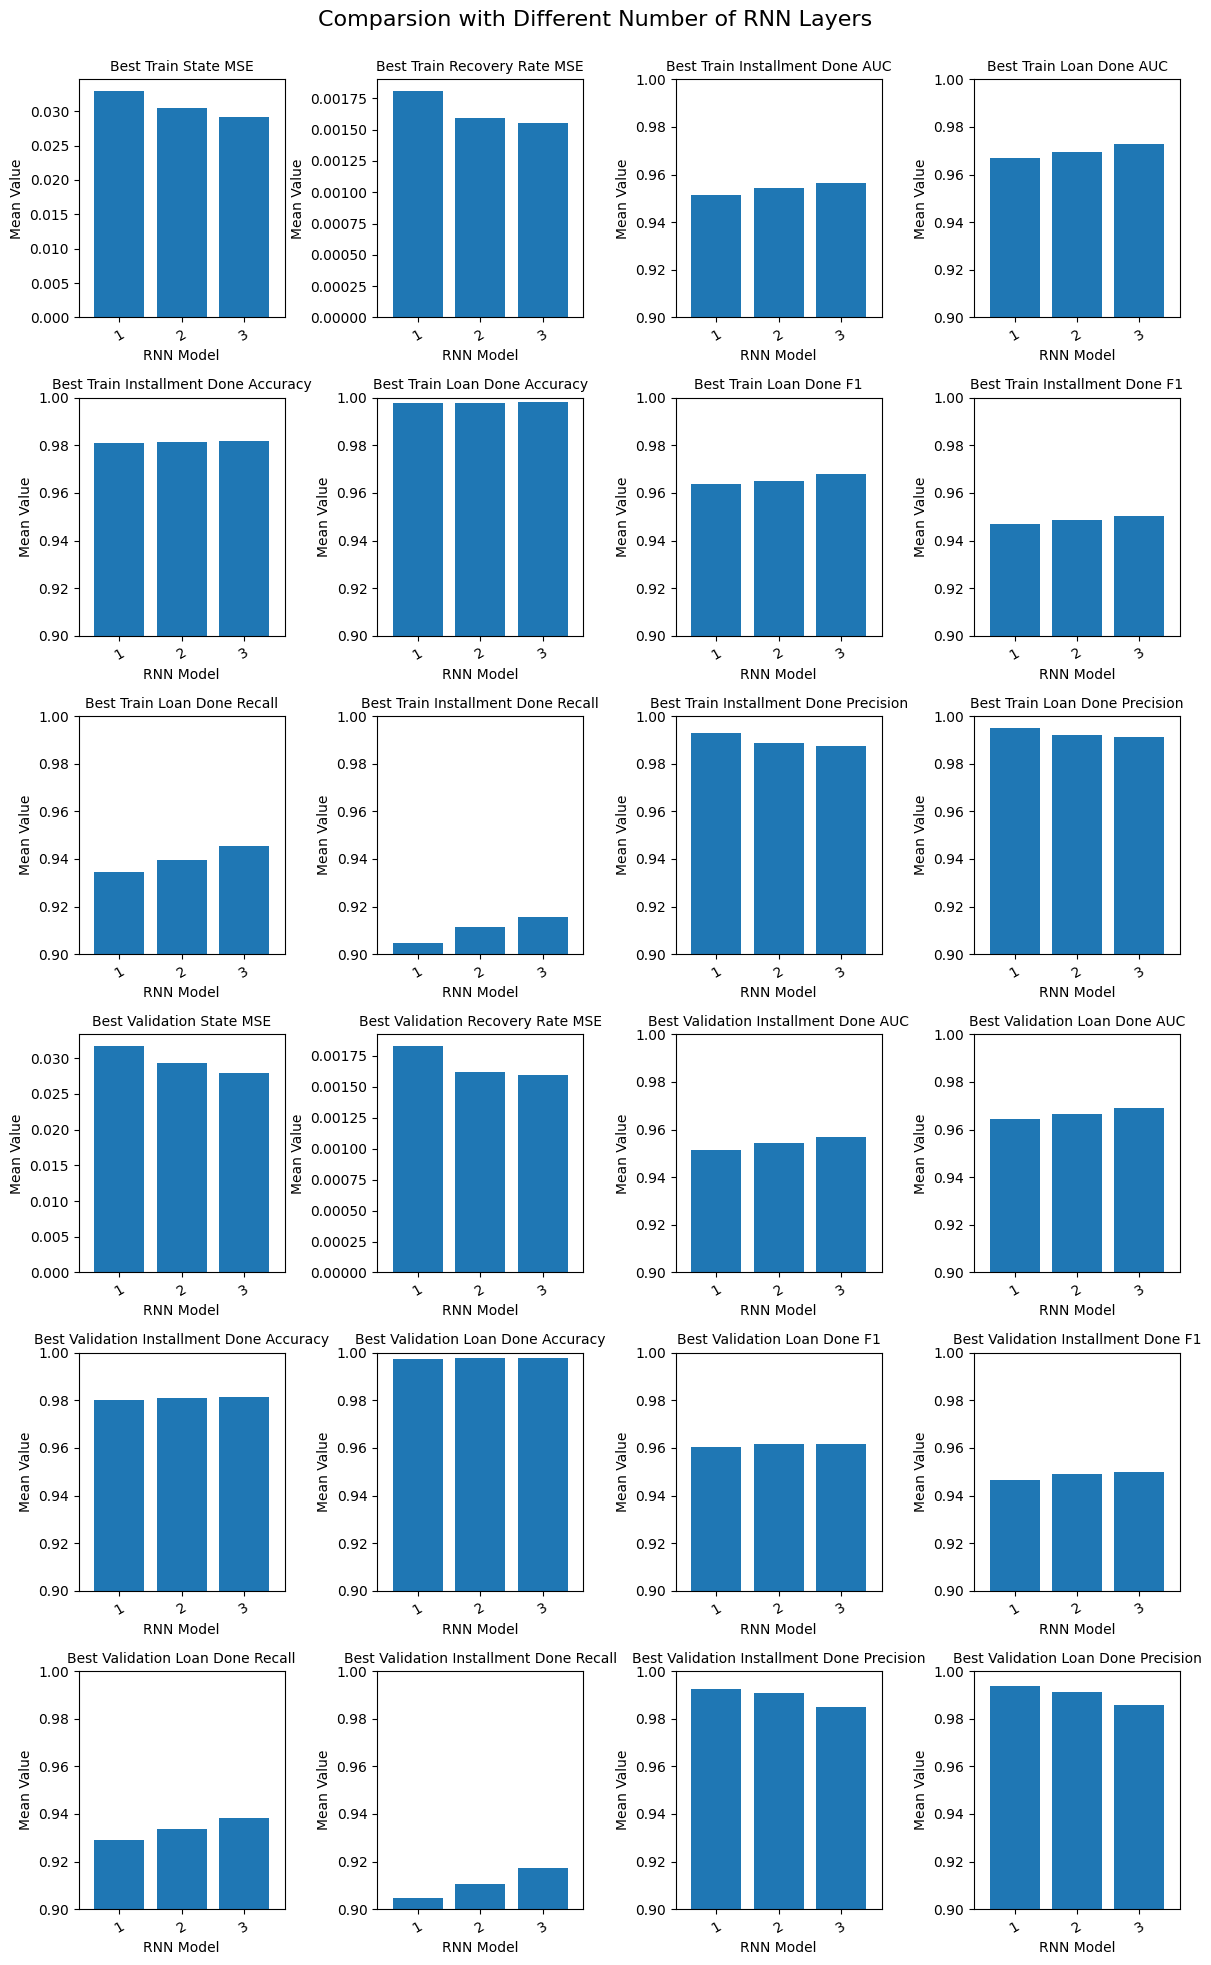

In [ ]:
rows, cols = 6, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 20))

mse_metrics = [
    "Best Train State MSE",
    "Best Train Recovery Rate MSE",
    "Best Validation State MSE",
    "Best Validation Recovery Rate MSE",
]

# grouped_means = final_df.groupby("RNN Model")[metrics].mean()

# draw bar plot for each metric
for ax, metric in zip(axes.flat, metrics):
    RNN_num_layers_grouped_means[metric].plot(kind="bar", ax=ax, width=0.8)
    ax.set_title(metric, fontsize=10)
    ax.set_ylabel("Mean Value")
    ax.set_xlabel("RNN Model")
    ax.tick_params(axis="x", rotation=30)

    # set y-axis range to [0, 1] for MSE metrics
    if metric not in mse_metrics:
        ax.set_ylim(0.9, 1)  # except MSE, set y-axis range to [0.9, 1]

# add a title for the whole figure
fig.suptitle("Comparsion with Different Number of RNN Layers", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()